Kütüphanelerin yüklenmesi

In [2]:
!pip install -U scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.8 MB/s eta 0:00:00


Girdilerin ve Çıktıların tanımlanması

In [4]:
quality = ctrl.Antecedent(np.arange(0,11,1),"quality")
service = ctrl.Antecedent(np.arange(0,11,1), "service")
tip = ctrl.Antecedent(np.arange(0,26,1), "tip")

Kalite ve servis girdileri için üyelik fonksiyonlarının belirlenmesi

In [5]:
quality.automf(3)
service.automf(3)

Çıktı değeri için üyelik fonksiyonun belirlenmesi

In [6]:
tip["düşük"] = fuzz.trimf(tip.universe,[0,0,13])
tip["orta"] = fuzz.trimf(tip.universe,[0,13,25])
tip["yüksek"] = fuzz.trimf(tip.universe,[13,25,25])

Kalite girdisine ait üyelik fonksiyonlarının görsel olarak incelenmesi

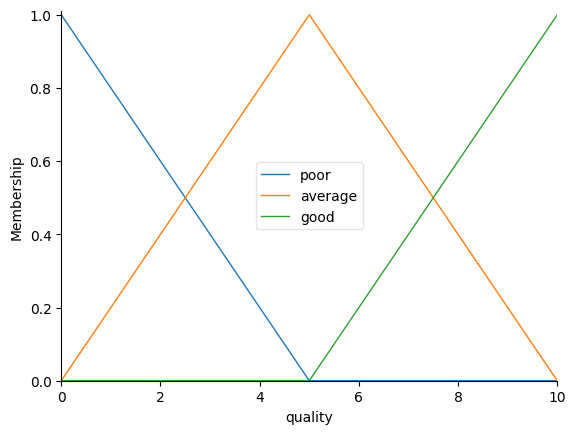

In [7]:
quality.view()

Servis girdisine ait üyelik fonksiyonlarının görsel olarak incelenmesi

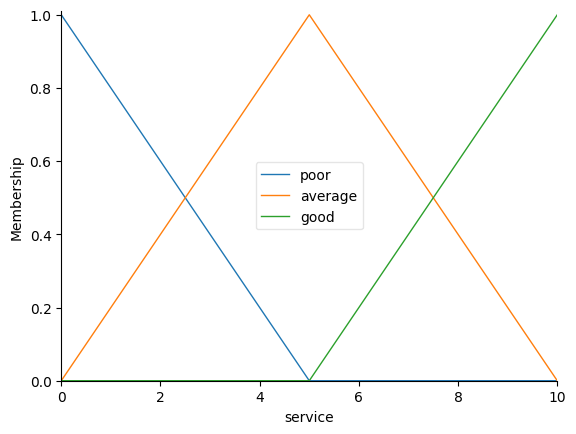

In [8]:
service.view()

Bahşiş çıktısına ait üyelik fonksiyonlarının görsel olarak incelenmesi

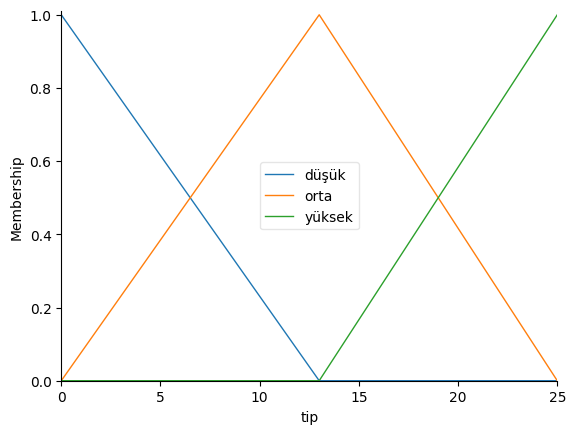

In [9]:
tip.view()

Bulanık kuralların belirlenmesi

In [10]:
rule1 = ctrl.Rule(quality["good"] | service["good"], tip["düşük"])
rule2 = ctrl.Rule(service["average"], tip["orta"])
rule3 = ctrl.Rule(service["poor"] | quality["poor"], tip["düşük"])

Bahşişin belirlenmesi

In [12]:
tipControl = ctrl.ControlSystem([rule1,rule2,rule3])
tipSet = ctrl.ControlSystemSimulation(tipControl)

Bahşiş Hesaplanması

In [20]:
tipSet.input["quality"] = 3.2
tipSet.input["service"] = 2.4
tipSet.compute()
print(tipSet.output["tip"])

ValueError: All antecedents must have input values!

Bahşişin görsel olarak gösterilmesi

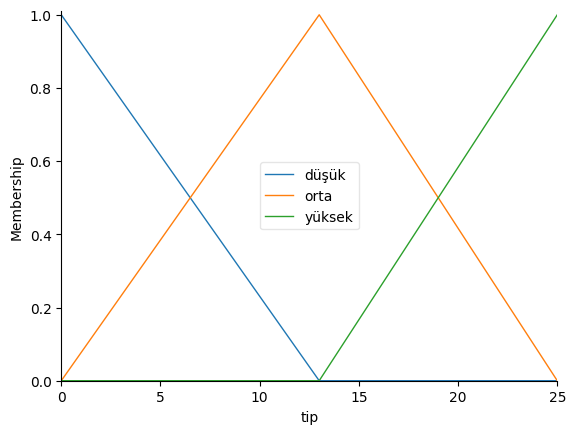

In [18]:
tip.view(sim = tipSet)